In [1]:
import numpy as np
import pandas as pd
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

## ML без features

In [2]:
for well in ['5351', '5599', '7078', '7289', '7405f']:
    train_data_path = f'input_data/{well}_target.csv'
    train_data = pd.read_csv(train_data_path)

    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=100,
                                    max_window_size=30,
                                    make_future_prediction=True))

    data = InputData(idx=np.arange(len(train_data)),
                     target=train_data.target,
                     features=None,
                     task=task,
                     data_type=DataTypesEnum.ts)

    model = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))

    chain = model.fit(features=data, predefined_model='rfr')

    ts_forecast = model.forecast(pre_history=data, forecast_length=100)
    from numpy import savetxt
    ml = ts_forecast
    savetxt(f'final/ml{well}.csv', ml, delimiter=',')

## ML c использованием результатов CRM в качестве features 

In [3]:
for well in ['5351', '5599', '7078', '7289', '7405f']:
    train_data_path = f'input_data/{well}_target.csv'
    train_data = pd.read_csv(train_data_path)
    features_data_path = f'input_data/crm_target{well}.csv'
    features_data = pd.read_csv(features_data_path).to_numpy()

    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=100,
                                    max_window_size=30,
                                    make_future_prediction=True))

    data = InputData(idx=np.arange(len(train_data)),
                     target=train_data.target,
                     features=features_data,
                     task=task,
                     data_type=DataTypesEnum.ts)

    model = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))

    chain = model.fit(features=data, predefined_model='rfr')

    ts_forecast = model.forecast(pre_history=data, forecast_length=100)
    from numpy import savetxt
    ml = ts_forecast
    savetxt(f'final/ml_crm{well}.csv', ml, delimiter=',')

## ML c использованием гибрида CRM+CRMIP в качестве features 

In [4]:
for well in ['5351', '5599', '7078', '7289', '7405f']:
    train_data_path = f'input_data/{well}_target.csv'
    train_data = pd.read_csv(train_data_path)
    features_data_path = f'input_data/hybrid_target{well}.csv'
    features_data = pd.read_csv(features_data_path).to_numpy()

    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=100,
                                    max_window_size=30,
                                    make_future_prediction=True))

    data = InputData(idx=np.arange(len(train_data)),
                     target=train_data.target,
                     features=features_data,
                     task=task,
                     data_type=DataTypesEnum.ts)

    model = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))

    chain = model.fit(features=data, predefined_model='rfr')

    ts_forecast = model.forecast(pre_history=data, forecast_length=100)
    from numpy import savetxt
    ml = ts_forecast
    savetxt(f'final/ml_hybrid{well}.csv', ml, delimiter=',')

## Расчет метрик и отрисовка графиков

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Metrics for 5351
MAE for CRM: 530.1611741824374
MAE for ML: 67.66445399999996
MAE for ML_CRM: 64.54700799999996
MAE for Hybrid_ML: 58.213139999999974
RMSE for CRM: 535.3561028206307
RMSE for ML: 79.8951293805035
RMSE for ML_CRM: 78.55943328473288
RMSE for Hybrid_ML: 74.45706788803868
MAPE for CRM: 216.08099044881902
MAPE for ML: 31.94986701698868
MAPE for ML_CRM: 31.055061199466078
MAPE for Hybrid_ML: 28.678906811273997 

Metrics for 5599
MAE for CRM: 195.3743359748352
MAE for ML: 575.7711280000001
MAE for ML_CRM: 595.2900020000001
MAE for Hybrid_ML: 581.25561
RMSE for CRM: 230.25601253194225
RMSE for ML: 594.8730555567213
RMSE for ML_CRM: 612.9193786019588
RMSE for Hybrid_ML: 600.6850143213987
MAPE for CRM: 42.86405536777662
MAPE for ML: 76.02365247468735
MAPE for ML_CRM: 78.68325637539081
MAPE for Hybrid_ML: 76.78159171283376 

Metrics for 7078
MAE for CRM: 148.94035499412857
MAE for ML: 138.254578
MAE for ML_CRM: 146.27115199999997
MAE for Hybrid_ML: 120.48392999999996
RMSE for CRM:

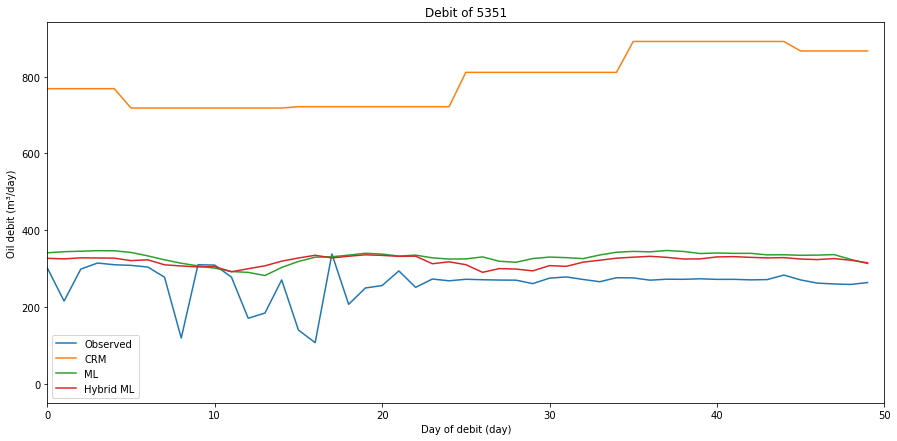

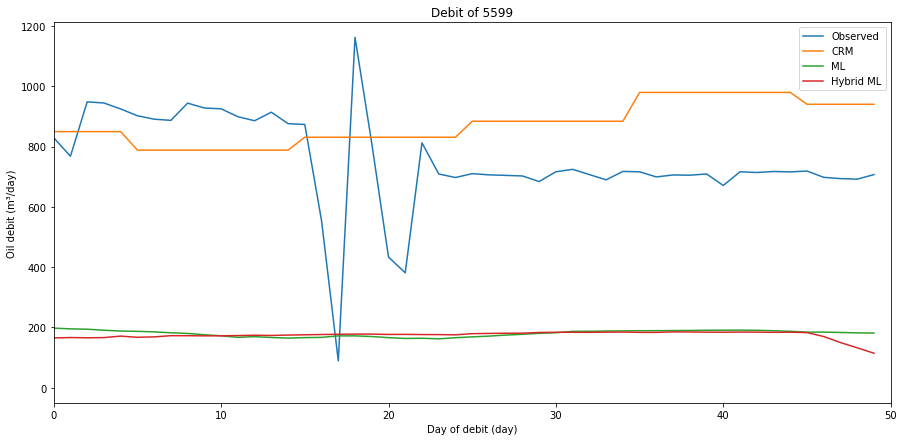

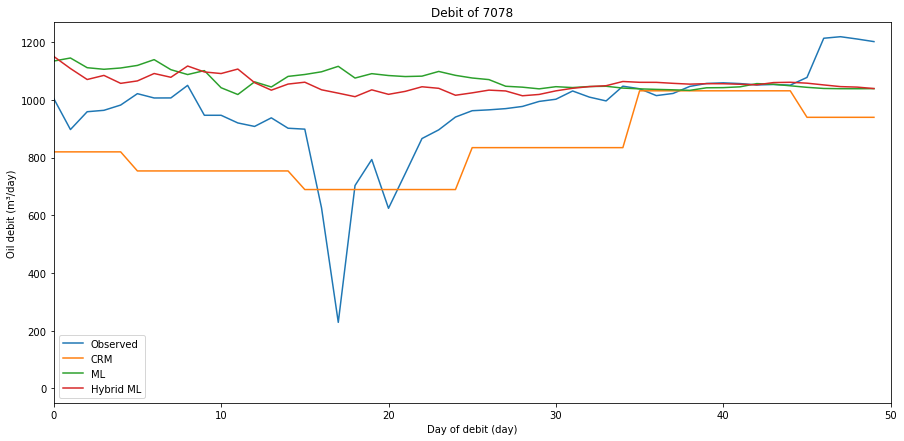

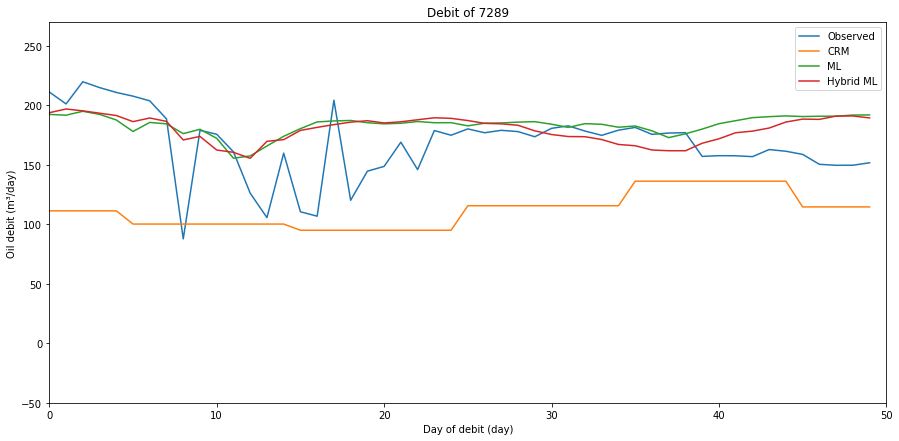

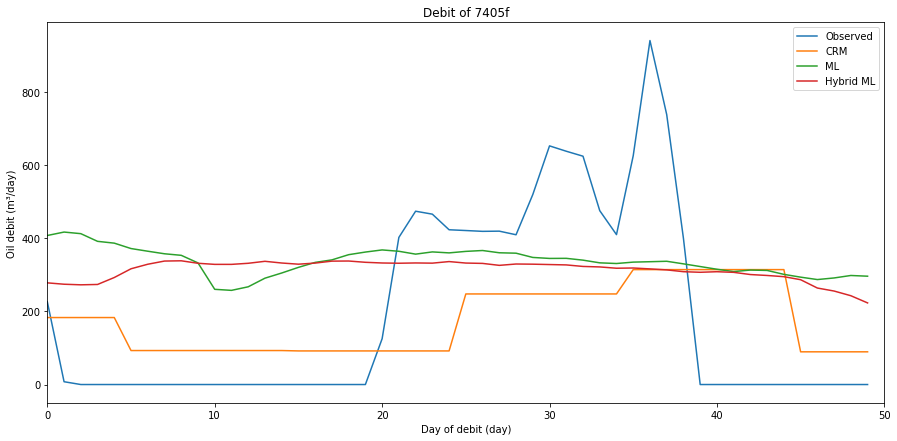

In [6]:
for well in ['5351', '5599', '7078', '7289', '7405f']:
    prod1 = pd.read_csv(f'final/prod{well}.csv').values
    crm1 = pd.read_csv(f'final/crm{well}.csv').values
    ml_crm1 = pd.read_csv(f'final/ml_crm{well}.csv').values
    ml1 = pd.read_csv(f'final/ml{well}.csv').values
    hybrid1 = pd.read_csv(f'final/ml_hybrid{well}.csv').values

    prod = prod1[0:50]
    crm = crm1[0:50]
    ml_crm = ml_crm1[0:50]
    ml = ml1[0:50]
    hybrid = hybrid1[0:50]
    
    if max(prod) > max(crm):
        high_border = max(prod)
    else:
        high_border = max(crm)

    f, axs = plt.subplots(figsize=(15, 7))
    ax = plt.gca()
    plt.axis([0, len(prod), -50, high_border+50])
    ax.set_autoscale_on(False)
    ax.set_title(f'Debit of {well}')

    plt.plot(prod, label="Observed")
    plt.plot(crm, label="CRM")
    plt.plot(ml, label="ML")
    plt.plot(hybrid, label="Hybrid ML")

    plt.legend(labels=['Observed', 'CRM', 'ML', 'Hybrid ML'])

    ax.set_xlabel('Day of debit (day)')
    ax.set_ylabel('Oil debit (m³/day)')
    ax.set_rasterized(True)
    plt.savefig(f'{well}YSC.eps', format='eps')
    plt.savefig(f'{well}YSC.png')

    print(f"Metrics for {well}")

    print('MAE for CRM:', mean_absolute_error(prod, crm))
    print('MAE for ML:', mean_absolute_error(prod, ml))
    print('MAE for ML_CRM:', mean_absolute_error(prod, ml_crm))
    print('MAE for Hybrid_ML:', mean_absolute_error(prod, hybrid))

    print('RMSE for CRM:', mean_squared_error(prod, crm, squared=False))
    print('RMSE for ML:', mean_squared_error(prod, ml, squared=False))
    print('RMSE for ML_CRM:', mean_squared_error(prod, ml_crm, squared=False))
    print('RMSE for Hybrid_ML:', mean_squared_error(prod, hybrid, squared=False))

    print('MAPE for CRM:', mean_absolute_percentage_error(prod, crm))
    print('MAPE for ML:', mean_absolute_percentage_error(prod, ml))
    print('MAPE for ML_CRM:', mean_absolute_percentage_error(prod, ml_crm))
    print('MAPE for Hybrid_ML:', mean_absolute_percentage_error(prod, hybrid), '\n')